<h1><center>Magic Score Rebalancing</center></h1>

## 1. Data Extraction

I have used requests and BeautifulSoup library to carry out web scraping.

In [522]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

I have used Dow Jones index components as the universe of stocks. This is not the right approach, becuse they do contain a few finance companied which are to be excluded in the universe of stocks.

In [249]:
tickers=[]
for p in range(1,3):
    url = 'https://money.cnn.com/data/markets/dow/?page='+str(p)
    page = requests.get(url)
    page_content = page.content
    soup = BeautifulSoup(page_content,'html.parser') 
    tabl = soup.find_all("table", {"class" : 'wsod_dataTable wsod_dataTableBig'})
    for t in tabl:
        rows = t.find_all("a", {"class" : 'wsod_symbol'})
        for row in rows:
            name=(row.get_text()).split()
            tickers.append(name[0])

I have extracted data from Yahoo Finance using web scraping.

In [250]:
financial_dir_curr = {} 
financial_dir_py = {} 
financial_dir_py2 = {} 
financial_dir_py3 = {} 

In [375]:
for ticker in tickers:
    try:
        print("scraping financial statement data for ",ticker)
        temp_dir = {}
        temp_dir2 = {}
        temp_dir3 = {}
        temp_dir4 = {}
    #getting balance sheet data from yahoo finance 
        url = 'https://in.finance.yahoo.com/quote/'+ticker+'/balance-sheet?p='+ticker
#         print(url)
        page = requests.get(url)
        page_content = page.content
        soup = BeautifulSoup(page_content,'html.parser')
        tabl = soup.find_all("div", {"class" : "M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)"})
        for t in tabl:
            rows = t.find_all("div", {"class" : "rw-expnded"})
            for row in rows:
                temp_dir[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[1]
                temp_dir2[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[2]
                temp_dir3[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[3]
                temp_dir4[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[4]
        
        #getting income statement data from yahoo finance 
        url = 'https://in.finance.yahoo.com/quote/'+ticker+'/financials?p='+ticker
#         print(url)
        page = requests.get(url)
        page_content = page.content
        soup = BeautifulSoup(page_content,'html.parser')
        tabl = soup.find_all("div", {"class" : "M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)"})
        for t in tabl:
            rows = t.find_all("div", {"class" : "rw-expnded"})
            for row in rows:
                temp_dir[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[1]
                temp_dir2[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[2]
                temp_dir3[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[3]
                temp_dir4[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[4]

        
        #getting cashflow statement data from yahoo finance 
        url = 'https://in.finance.yahoo.com/quote/'+ticker+'/cash-flow?p='+ticker
        page = requests.get(url)
#         print(url)
        page_content = page.content
        soup = BeautifulSoup(page_content,'html.parser')
        tabl = soup.find_all("div", {"class" : "M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)"})
        for t in tabl:
            rows = t.find_all("div", {"class" : "rw-expnded"})
            for row in rows:
                temp_dir[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[1]
                temp_dir2[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[2]
                temp_dir3[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[3] 
                temp_dir4[row.get_text(separator='|').split("|")[0]]=row.get_text(separator='|').split("|")[4] 
                
            
        temp_dir['Price']= pdr.get_data_yahoo(ticker,start="2019-12-30", end="2019-12-30", interval='d')['Close'][0]
        temp_dir2['Price']= pdr.get_data_yahoo(ticker,start="2018-12-31", end="2018-12-31", interval='d')['Close'][0]
        temp_dir3['Price']= pdr.get_data_yahoo(ticker,start="2017-12-29", end="2017-12-29", interval='d')['Close'][1]
        temp_dir4['Price']= pdr.get_data_yahoo(ticker,start="2016-12-29", end="2016-12-29", interval='d')['Close'][1]
        
        financial_dir_curr[ticker] = temp_dir
        financial_dir_py[ticker] = temp_dir2
        financial_dir_py2[ticker] = temp_dir3
        financial_dir_py3[ticker] = temp_dir4
    except:
        print("Problem scraping data for ",ticker)

scraping financial statement data for  AXP
scraping financial statement data for  AAPL
scraping financial statement data for  BA
scraping financial statement data for  CAT
scraping financial statement data for  CVX
scraping financial statement data for  CSCO
scraping financial statement data for  KO
scraping financial statement data for  DIS
scraping financial statement data for  XOM
scraping financial statement data for  GS
scraping financial statement data for  HD
scraping financial statement data for  IBM
scraping financial statement data for  INTC
Problem scraping data for  INTC
scraping financial statement data for  JNJ
scraping financial statement data for  JPM
scraping financial statement data for  MCD
scraping financial statement data for  MRK
scraping financial statement data for  NKE
scraping financial statement data for  PFE
scraping financial statement data for  RTX
scraping financial statement data for  TRV
scraping financial statement data for  UNH
scraping financial stat

I had saved the data in directory. Below, I have saved the directory into Pandas Dataframe. <br>
There is also a possibility that data of few tickers might not have been imported and hence I am updating the tickers list.

In [415]:
combined_financials_2019 = pd.DataFrame(financial_dir_curr)
combined_financials_2018 = pd.DataFrame(financial_dir_py)
combined_financials_2017 = pd.DataFrame(financial_dir_py2)
combined_financials_2016 = pd.DataFrame(financial_dir_py3)
tickers = combined_financials_2019.columns 
index = combined_financials_2019.index

## 2. Data Cleaning and Calculation

I had extracted a lot of data, but we only need a few specific details and hence I have compiled them in a dataframe below.

In [416]:
stats = ["Operating income or loss",
         "Net income available to common shareholders",
         "Net cash provided by operating activities",
         "Capital expenditure",
         "Total current assets",
         "Total current liabilities",
         "Net property, plant and equipment",
         "Total stockholders' equity",
         "Long-term debt",
         "Basic average shares",
        "Price"] 

indx = ["EBIT","NetIncome","CashFlowOps","Capex","CurrAsset",
        "CurrLiab","PPE","BookValue","TotDebt", "ShareOut","Price"]

In [417]:
for i in stats:
    if i not in index:
        print( i + ": Error, check row name")

In [418]:
all_stats = {}
for ticker in tickers:
    try:
#         print(ticker)
        temp = combined_financials_2019[ticker]
#         print(temp)
        ticker_stats = []
        for stat in stats:
#             print(temp.loc[stat])
            ticker_stats.append(temp.loc[stat])
        all_stats['{}'.format(ticker)] = ticker_stats
    except:
        print("can't read data for ",ticker)
all_stats_2019 = pd.DataFrame(all_stats,index=indx)

In [419]:
all_stats = {}
for ticker in tickers:
    try:
#         print(ticker)
        temp = combined_financials_2018[ticker]
#         print(temp)
        ticker_stats = []
        for stat in stats:
#             print(temp.loc[stat])
            ticker_stats.append(temp.loc[stat])
        all_stats['{}'.format(ticker)] = ticker_stats
    except:
        print("can't read data for ",ticker)
all_stats_2018 = pd.DataFrame(all_stats,index=indx)

In [420]:
all_stats = {}
for ticker in tickers:
    try:
#         print(ticker)
        temp = combined_financials_2017[ticker]
#         print(temp)
        ticker_stats = []
        for stat in stats:
#             print(temp.loc[stat])
            ticker_stats.append(temp.loc[stat])
        all_stats['{}'.format(ticker)] = ticker_stats
    except:
        print("can't read data for ",ticker)
all_stats_2017 = pd.DataFrame(all_stats,index=indx)

In [421]:
all_stats = {}
for ticker in tickers:
    try:
#         print(ticker)
        temp = combined_financials_2016[ticker]
#         print(temp)
        ticker_stats = []
        for stat in stats:
#             print(temp.loc[stat])
            ticker_stats.append(temp.loc[stat])
        all_stats['{}'.format(ticker)] = ticker_stats
    except:
        print("can't read data for ",ticker)
all_stats_2016 = pd.DataFrame(all_stats,index=indx)

In [422]:
all_stats_2019[tickers] = all_stats_2019[tickers].replace({',': ''}, regex=True) 
all_stats_2018[tickers] = all_stats_2018[tickers].replace({',': ''}, regex=True) 
all_stats_2017[tickers] = all_stats_2017[tickers].replace({',': ''}, regex=True) 
all_stats_2016[tickers] = all_stats_2016[tickers].replace({',': ''}, regex=True) 
for ticker in all_stats_2019.columns:
    all_stats_2019[ticker] = pd.to_numeric(all_stats_2019[ticker].values,errors='coerce',downcast='float')
for ticker in all_stats_2018.columns:
    all_stats_2018[ticker] = pd.to_numeric(all_stats_2018[ticker].values,errors='coerce',downcast='float')
for ticker in all_stats_2017.columns:
    all_stats_2017[ticker] = pd.to_numeric(all_stats_2017[ticker].values,errors='coerce',downcast='float')
for ticker in all_stats_2016.columns:
    all_stats_2016[ticker] = pd.to_numeric(all_stats_2016[ticker].values,errors='coerce',downcast='float')
all_stats_2016

,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,...,MRK,NKE,PFE,RTX,TRV,UNH,VZ,V,WMT,WBA
EBIT,NaN,6.134400e+07,1.005300e+07,4.406000e+06,2.480000e+06,1.272900e+07,9.427000e+06,1.387300e+07,1.207400e+07,NaN,...,7.309000e+06,4.445000e+06,1.410700e+07,8.672000e+06,NaN,1.418600e+07,2.918800e+07,1.216300e+07,2.043700e+07,5.422000e+06
NetIncome,2.634000e+06,4.835100e+07,8.191000e+06,7.540000e+05,9.195000e+06,9.609000e+06,1.248000e+06,8.980000e+06,1.971000e+07,3.685000e+06,...,2.394000e+06,1.933000e+06,2.130700e+07,4.552000e+06,2.041000e+06,1.055800e+07,3.010100e+07,6.467000e+06,9.862000e+06,4.078000e+06
CashFlowOps,1.354000e+07,6.359800e+07,1.334400e+07,5.702000e+06,2.051500e+07,1.387600e+07,7.106000e+06,1.234300e+07,3.006600e+07,-1.774200e+07,...,6.447000e+06,4.955000e+06,1.647000e+07,5.631000e+06,3.762000e+06,1.359600e+07,2.530500e+07,9.208000e+06,2.833700e+07,7.251000e+06
Capex,-1.062000e+06,-1.279500e+07,-1.870000e+06,-2.336000e+06,-1.340400e+07,-9.640000e+05,-1.675000e+06,-3.623000e+06,-1.540200e+07,-3.185000e+06,...,-1.888000e+06,-1.028000e+06,-2.217000e+06,-2.394000e+06,NaN,-2.023000e+06,-1.783000e+07,-7.070000e+05,-1.005100e+07,-1.351000e+06
CurrAsset,NaN,1.068690e+08,6.248800e+07,3.196700e+07,2.961900e+07,7.871900e+07,3.401000e+07,1.696600e+07,4.141600e+07,NaN,...,3.061400e+07,1.606100e+07,3.894900e+07,2.855000e+07,NaN,3.387900e+07,2.639500e+07,1.431300e+07,5.768900e+07,2.588300e+07
CurrLiab,NaN,7.900600e+07,5.013400e+07,2.613200e+07,3.178500e+07,2.491100e+07,2.653200e+07,1.684200e+07,4.763800e+07,NaN,...,1.720400e+07,5.474000e+06,3.111500e+07,2.190600e+07,NaN,4.925200e+07,3.034000e+07,8.046000e+06,6.692800e+07,1.701300e+07
PPE,NaN,2.701000e+07,1.280700e+07,1.532200e+07,1.821860e+08,3.506000e+06,1.063500e+07,2.734900e+07,2.442240e+08,NaN,...,1.202600e+07,3.989000e+06,1.331800e+07,9.158000e+06,NaN,5.901000e+06,8.475100e+07,2.150000e+06,1.141780e+08,1.433500e+07
BookValue,2.050100e+07,1.282490e+08,8.170000e+05,1.313700e+07,1.455560e+08,6.358600e+07,2.306200e+07,4.326500e+07,1.673250e+08,8.689300e+07,...,4.008800e+07,1.240700e+07,5.954400e+07,2.757900e+07,2.322100e+07,3.827400e+07,2.252400e+07,3.291200e+07,7.779800e+07,2.988000e+07
TotDebt,NaN,7.542700e+07,9.487000e+06,2.275000e+07,3.519300e+07,2.448300e+07,2.968400e+07,1.648300e+07,2.770700e+07,NaN,...,2.427400e+07,3.471000e+06,3.139800e+07,2.169700e+07,NaN,2.577700e+07,1.054330e+08,1.588200e+07,3.601500e+07,1.870500e+07
ShareOut,8.830000e+05,5.217242e+06,6.027210e+05,5.918000e+05,1.882834e+06,5.010000e+06,4.272000e+06,1.568000e+06,4.256000e+06,4.016000e+05,...,2.696612e+06,1.623800e+06,5.970000e+06,7.900000e+05,2.760000e+05,9.690000e+05,4.084000e+06,2.305000e+06,2.995000e+06,1.073500e+06


## 3. Magic Formula 

Magic Formula is based on identifying wonderful stocks at bargain price.
It is usually applied to large cap stocks, financial and insurance companies are excluded coz their balance sheet is altogether different.
We rank companies based on Earning Yield and Return on Capital(ROC).

Below, I have calculated all the values that we might require during magic score calculation

In [423]:
transpose_df = all_stats_2019.transpose()
final_stats_2019 = pd.DataFrame()
final_stats_2019["EBIT"] = transpose_df["EBIT"]
final_stats_2019["TEV"] =  ( transpose_df["Price"].fillna(0) * transpose_df["ShareOut"].fillna(0) )  + transpose_df["TotDebt"].fillna(0) \
                         -(transpose_df["CurrAsset"].fillna(0)-transpose_df["CurrLiab"].fillna(0))
final_stats_2019["EarningYield"] =  final_stats_df["EBIT"]/final_stats_df["TEV"]
final_stats_2019["ROC"]  = transpose_df["EBIT"]/(transpose_df["PPE"]+transpose_df["CurrAsset"]-transpose_df["CurrLiab"])

In [424]:
transpose_df = all_stats_2018.transpose()
final_stats_2018 = pd.DataFrame()
final_stats_2018["EBIT"] = transpose_df["EBIT"]
final_stats_2018["TEV"] =  ( transpose_df["Price"].fillna(0) * transpose_df["ShareOut"].fillna(0) )  + transpose_df["TotDebt"].fillna(0) \
                         -(transpose_df["CurrAsset"].fillna(0)-transpose_df["CurrLiab"].fillna(0))
final_stats_2018["EarningYield"] =  final_stats_df["EBIT"]/final_stats_df["TEV"]
final_stats_2018["ROC"]  = transpose_df["EBIT"]/(transpose_df["PPE"]+transpose_df["CurrAsset"]-transpose_df["CurrLiab"])

In [425]:
transpose_df = all_stats_2017.transpose()
final_stats_2017 = pd.DataFrame()
final_stats_2017["EBIT"] = transpose_df["EBIT"]
final_stats_2017["TEV"] =  ( transpose_df["Price"].fillna(0) * transpose_df["ShareOut"].fillna(0) )  + transpose_df["TotDebt"].fillna(0) \
                         -(transpose_df["CurrAsset"].fillna(0)-transpose_df["CurrLiab"].fillna(0))
final_stats_2017["EarningYield"] =  final_stats_df["EBIT"]/final_stats_df["TEV"]
final_stats_2017["ROC"]  = transpose_df["EBIT"]/(transpose_df["PPE"]+transpose_df["CurrAsset"]-transpose_df["CurrLiab"])

In [426]:
transpose_df = all_stats_2016.transpose()
final_stats_2016 = pd.DataFrame()
final_stats_2016["EBIT"] = transpose_df["EBIT"]
final_stats_2016["TEV"] =  ( transpose_df["Price"].fillna(0) * transpose_df["ShareOut"].fillna(0) )  + transpose_df["TotDebt"].fillna(0) \
                         -(transpose_df["CurrAsset"].fillna(0)-transpose_df["CurrLiab"].fillna(0))
final_stats_2016["EarningYield"] =  final_stats_df["EBIT"]/final_stats_df["TEV"]
final_stats_2016["ROC"]  = transpose_df["EBIT"]/(transpose_df["PPE"]+transpose_df["CurrAsset"]-transpose_df["CurrLiab"])

### Magic Formula Rank 2019

In [475]:
final_stats_val_2019 = final_stats_2019.loc[tickers,:]
final_stats_val_2019["CombRank"] = final_stats_val_2019["EarningYield"].rank(ascending=False,na_option='bottom')+final_stats_val_2019["ROC"].rank(ascending=False,na_option='bottom')
final_stats_val_2019["MagicFormulaRank"] = final_stats_val_2019["CombRank"].rank(method='first')
value_stocks_2019 = final_stats_val_2019.sort_values("MagicFormulaRank").iloc[:,[2,3,5]]
print(value_stocks_2019)

      EarningYield       ROC  MagicFormulaRank
V         1.739917  1.557268               1.0
AAPL      1.889904  0.694239               2.0
JNJ       1.250407  0.796759               3.0
KO        0.307471  2.450421               4.0
MRK       0.733360  0.630734               5.0
PFE       0.336885  1.439785               6.0
HD        0.569928  0.520872               7.0
CAT       0.551285  0.293884               8.0
RTX       0.250251  0.477854               9.0
IBM       0.169886  0.576762              10.0
VZ        0.273370  0.273658              11.0
WMT       0.349208  0.187701              12.0
CSCO     -9.220025  0.767683              13.0
DIS       0.223867  0.326076              14.0
MCD       0.251179  0.229819              15.0
UNH       0.406409 -2.177423              16.0
XOM       0.237069  0.038284              17.0
NKE      -1.737962  0.246158              18.0
WBA       0.065944  0.186895              19.0
CVX      -0.025717 -0.003697              20.0
BA       -0.4

### Magic Formula Rank 2018

In [476]:
final_stats_val_2018 = final_stats_2018.loc[tickers,:]
final_stats_val_2018["CombRank"] = final_stats_val_2018["EarningYield"].rank(ascending=False,na_option='bottom')+final_stats_val_2018["ROC"].rank(ascending=False,na_option='bottom')
final_stats_val_2018["MagicFormulaRank"] = final_stats_val_2018["CombRank"].rank(method='first')
value_stocks_2018 = final_stats_val_2018.sort_values("MagicFormulaRank").iloc[:,[2,3,5]]


### Magic Formula Rank 2017

In [477]:
final_stats_val_2017 = final_stats_2017.loc[tickers,:]
final_stats_val_2017["CombRank"] = final_stats_val_2017["EarningYield"].rank(ascending=False,na_option='bottom')+final_stats_val_2017["ROC"].rank(ascending=False,na_option='bottom')
final_stats_val_2017["MagicFormulaRank"] = final_stats_val_2017["CombRank"].rank(method='first')
value_stocks_2017 = final_stats_val_2017.sort_values("MagicFormulaRank").iloc[:,[2,3,5]]


### Magic Formula Rank 2016

In [479]:
final_stats_val_2016 = final_stats_2016.loc[tickers,:]
final_stats_val_2016["CombRank"] = final_stats_val_2016["EarningYield"].rank(ascending=False,na_option='bottom')+final_stats_val_2016["ROC"].rank(ascending=False,na_option='bottom')
final_stats_val_2016["MagicFormulaRank"] = final_stats_val_2016["CombRank"].rank(method='first')
value_stocks_2016 = final_stats_val_2016.sort_values("MagicFormulaRank").iloc[:,[2,3,5]]

## 4. Magic Formula Rebalancing

I am assuming I have 1,000,000 (1 mil) at the start of 2017. I invest in top 10 Magic Ranked stocks. I invest 100,000 in each stock.

In [508]:
stock=[]
cash=[]
portfolio=[]
stock_val=0
cash_val=1000000
portfolio_val=cash_val+stock_val
index_2016=value_stocks_2016.index
index_2016=index_2016[0:10]
number_stocks={}
price={}
counter=0
for ticker in index_2016:
        a= pdr.get_data_yahoo(ticker,start="2017-01-03", end="2017-01-03", interval='d')['Open'][0]
        price[ticker]=a
        number_stocks[ticker]=int(100000/a)
        stock_val+=a*number_stocks[ticker]
        cash_val-=a*number_stocks[ticker]
portfolio_val=cash_val+stock_val
stock.append(stock_val)
cash.append(cash_val)
portfolio.append(portfolio_val)

In [509]:
index_2017=value_stocks_2017.index
index_2017=index_2017[0:10]
common_in_2016_2017=set(index_2017).intersection(set(index_2016))
magic_square_not_in_2017=set(index_2016)-set(index_2017)
new_magic_square_2017=set(index_2017)-set(index_2016)
common_in_2016_2017,new_magic_square_2017, magic_square_not_in_2017

({'AAPL', 'HD', 'IBM', 'JNJ', 'KO', 'MRK', 'PFE', 'V'},
 {'CAT', 'DIS'},
 {'MCD', 'RTX'})

In [510]:
# Update the currnet porfolio value
for i in common_in_2016_2017:
    a= pdr.get_data_yahoo(i,start="2018-01-02", end="2018-01-02", interval='d')['Open'][0]
    stock_val+=(a-price[i])*number_stocks[i]
    price[i]=a
# Selling Old
for i in magic_square_not_in_2017:
    a= pdr.get_data_yahoo(i,start="2018-01-02", end="2018-01-02", interval='d')['Open'][0]
    cash_val+=a*number_stocks[i]
    stock_val-=a*number_stocks[i]
    del price[i]
    del number_stocks[i]
# Buying New
for i in new_magic_square_2017:
    a= pdr.get_data_yahoo(i,start="2018-01-02", end="2018-01-02", interval='d')['Open'][0]
    number_stocks[i]=int(100000/a)
    price[i]=a
    stock_val+=a*number_stocks[i]
    cash_val-=a*number_stocks[i]
    
portfolio_val=cash_val+stock_val
stock.append(stock_val)
cash.append(cash_val)
portfolio.append(portfolio_val)

In [511]:
portfolio

[1000000.0, 1163821.1403388977]

In [512]:
index_2018=value_stocks_2018.index
index_2018=index_2018[0:10]
common_in_2017_2018=set(index_2018).intersection(set(index_2017))
magic_square_not_in_2018=set(index_2017)-set(index_2018)
new_magic_square_2018=set(index_2018)-set(index_2017)
common_in_2017_2018,new_magic_square_2018, magic_square_not_in_2018

({'AAPL', 'CAT', 'HD', 'IBM', 'JNJ', 'KO', 'MRK', 'PFE', 'V'},
 {'RTX'},
 {'DIS'})

In [513]:
# Update the currnet porfolio value
for i in common_in_2017_2018:
    a= pdr.get_data_yahoo(ticker,start="2019-01-02", end="2019-01-02", interval='d')['Open'][0]
    stock_val+=(a-price[i])*number_stocks[i]
    price[i]=a
# Selling Old
for i in magic_square_not_in_2018:
    a= pdr.get_data_yahoo(ticker,start="2019-01-02", end="2019-01-02", interval='d')['Open'][0]
    cash_val+=a*number_stocks[i]
    stock_val-=a*number_stocks[i]
    del price[i]
    del number_stocks[i]
# Buying New
for i in new_magic_square_2018:
    a= pdr.get_data_yahoo(ticker,start="2019-01-02", end="2019-01-02", interval='d')['Open'][0]
    number_stocks[i]=int(100000/a)
    price[i]=a
    stock_val+=a*number_stocks[i]
    cash_val-=a*number_stocks[i]
    
portfolio_val=cash_val+stock_val
stock.append(stock_val)
cash.append(cash_val)
portfolio.append(portfolio_val)

In [514]:
portfolio

[1000000.0, 1163821.1403388977, 2226683.758743286]

In [515]:
index_2019=value_stocks_2019.index
index_2019=index_2019[0:10]
common_in_2018_2019=set(index_2019).intersection(set(index_2018))
magic_square_not_in_2019=set(index_2018)-set(index_2019)
new_magic_square_2019=set(index_2019)-set(index_2018)
new_magic_square_2019
common_in_2018_2019,new_magic_square_2019, magic_square_not_in_2019

({'AAPL', 'CAT', 'HD', 'IBM', 'JNJ', 'KO', 'MRK', 'PFE', 'RTX', 'V'},
 set(),
 set())

In [517]:
# Update the currnet porfolio value
for i in common_in_2018_2019:
    a= pdr.get_data_yahoo(ticker,start="2020-01-02", end="2020-01-02", interval='d')['Open'][0]
    stock_val+=(a-price[i])*number_stocks[i]
    price[i]=a
# Selling Old
for i in magic_square_not_in_2019:
    a= pdr.get_data_yahoo(ticker,start="2020-01-02", end="2020-01-02", interval='d')['Open'][0]
    cash_val+=a*number_stocks[i]
    stock_val-=a*number_stocks[i]
    del price[i]
    del number_stocks[i]
# Buying New
for i in new_magic_square_2019:
    a= pdr.get_data_yahoo(ticker,start="2020-01-02", end="2020-01-02", interval='d')['Open'][0]
    number_stocks[i]=int(100000/a)
    price[i]=a
    stock_val+=a*number_stocks[i]
    cash_val-=a*number_stocks[i]

portfolio_val=cash_val+stock_val
stock.append(stock_val)
cash.append(cash_val)
portfolio.append(portfolio_val)

In [537]:
df=pd.DataFrame(portfolio, index=['2017','2018','2019','2020'],columns=['Portfolio Value'])
df

,Portfolio Value
2017,1.000000e+06
2018,1.163821e+06
2019,2.226684e+06
2020,2.513373e+06


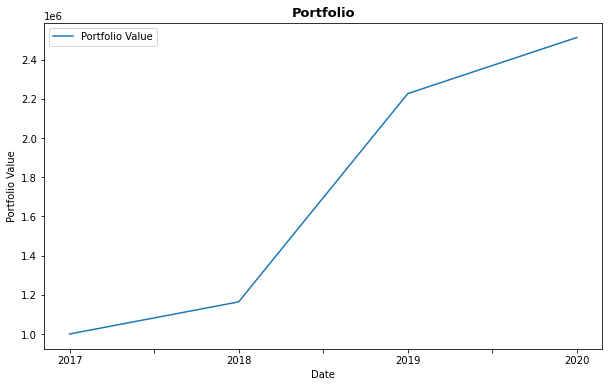

In [538]:
df.plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio',fontweight="bold",fontsize=13)
plt.show()